#Getting data
Getting data and performing a short EDA.

Original dataset can be found here: https://www.kaggle.com/datasets/dunyajasim/twitter-dataset-for-sentiment-analysis

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel("LabeledText.xlsx")

In [5]:
df

,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive
...,...,...,...
4864,995.txt,OMG. Well done #Eskom! 'Man dies during #LoadS...,positive
4865,996.txt,Feelin' the love in here! #ValentinesDay #caring,positive
4866,997.txt,#blue #eyes can't be #beaten,neutral
4867,998.txt,LA CHUCHA LOUUU TE CHUPO LOS OJOS..!,neutral


In [6]:
df.drop('File Name', axis=1, inplace=True)

In [7]:
df

,Caption,LABEL
0,How I feel today #legday #jelly #aching #gym,negative
1,@ArrivaTW absolute disgrace two carriages from...,negative
2,This is my Valentine's from 1 of my nephews. I...,positive
3,betterfeelingfilms: RT via Instagram: First da...,neutral
4,Zoe's first love #Rattled @JohnnyHarper15,positive
...,...,...
4864,OMG. Well done #Eskom! 'Man dies during #LoadS...,positive
4865,Feelin' the love in here! #ValentinesDay #caring,positive
4866,#blue #eyes can't be #beaten,neutral
4867,LA CHUCHA LOUUU TE CHUPO LOS OJOS..!,neutral


In [8]:
df['LABEL'].value_counts().sort_values()

negative    1452
positive    1646
neutral     1771
Name: LABEL, dtype: int64

In [9]:
df.isna().sum()

Caption    0
LABEL      0
dtype: int64

#Cleaning texts
Getting rid of symbols that are used in Twitter

In [10]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for emoji: filename=emoji-2.7.0-py2.py3-none-any.whl size=356563 sha256=781d327ae7ae313c075f656e08ac964d98c93db3c30a3d2e8bba3c2d82680f62
  Stored in directory: /root/.cache/pip/wheels/41/11/48/5df0b9727d5669c9174a141134f10304d1d78a3b89a4676f3d
Successfully built emoji


In [11]:
import re
import emoji
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob

In [12]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [13]:
stop_words = set(stopwords.words('english'))

In [14]:
def clean_tweet(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower().strip())
    text = re.sub('@[A-Za-z0-9_]+', '', text)
    text = re.sub('#','',text)
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text)
    text = re.sub('\n',' ',text)
    text = emoji.replace_emoji(text, replace='')
    return text

In [15]:
# example
clean_tweet("Zoe's first love #Rattled @JohnnyHarper15")

'zoe s first love  rattled  johnnyharper  '

In [16]:
# aplpying process to the whole df
df['cleanedTweet'] = df['Caption'].apply(clean_tweet)
df

,Caption,LABEL,cleanedTweet
0,How I feel today #legday #jelly #aching #gym,negative,how i feel today legday jelly aching gym
1,@ArrivaTW absolute disgrace two carriages from...,negative,arrivatw absolute disgrace two carriages from...
2,This is my Valentine's from 1 of my nephews. I...,positive,this is my valentine s from of my nephews i...
3,betterfeelingfilms: RT via Instagram: First da...,neutral,betterfeelingfilms rt via instagram first da...
4,Zoe's first love #Rattled @JohnnyHarper15,positive,zoe s first love rattled johnnyharper
...,...,...,...
4864,OMG. Well done #Eskom! 'Man dies during #LoadS...,positive,omg well done eskom man dies during loads...
4865,Feelin' the love in here! #ValentinesDay #caring,positive,feelin the love in here valentinesday caring
4866,#blue #eyes can't be #beaten,neutral,blue eyes can t be beaten
4867,LA CHUCHA LOUUU TE CHUPO LOS OJOS..!,neutral,la chucha louuu te chupo los ojos


#Lemmatization and Stopwords
To get to the root words. For example, to extract 'run' from the word 'running'.

In [17]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [18]:
def text_preprocessing(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

In [19]:
text_preprocessing('toe first love rattled johnnyharper15')

'toe love rattle johnnyharper15'

In [20]:
df['lemmatizedTweet'] = df['cleanedTweet'].apply(text_preprocessing)
df

,Caption,LABEL,cleanedTweet,lemmatizedTweet
0,How I feel today #legday #jelly #aching #gym,negative,how i feel today legday jelly aching gym,feel today legday jelly ache gym
1,@ArrivaTW absolute disgrace two carriages from...,negative,arrivatw absolute disgrace two carriages from...,arrivatw absolute disgrace carriage bangor h...
2,This is my Valentine's from 1 of my nephews. I...,positive,this is my valentine s from of my nephews i...,valentine s nephew elated little thing ...
3,betterfeelingfilms: RT via Instagram: First da...,neutral,betterfeelingfilms rt via instagram first da...,betterfeelingfilm rt instagram day film ...
4,Zoe's first love #Rattled @JohnnyHarper15,positive,zoe s first love rattled johnnyharper,zoe s love rattle johnnyharper
...,...,...,...,...
4864,OMG. Well done #Eskom! 'Man dies during #LoadS...,positive,omg well done eskom man dies during loads...,omg eskom man die loadshedde power...
4865,Feelin' the love in here! #ValentinesDay #caring,positive,feelin the love in here valentinesday caring,feelin love valentinesday care
4866,#blue #eyes can't be #beaten,neutral,blue eyes can t be beaten,blue eye t beat
4867,LA CHUCHA LOUUU TE CHUPO LOS OJOS..!,neutral,la chucha louuu te chupo los ojos,la chucha louuu te chupo los ojos


#Split Dataset
into train and test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df['lemmatizedTweet']
y = df['LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, stratify=y)

In [23]:
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

3895
974
3895
974


#CountVerctorizer
To transform texts into numerical representations (matrices), which can be inputted into ML models.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [26]:
X_train

<3895x13501 sparse matrix of type '<class 'numpy.int64'>'
	with 35265 stored elements in Compressed Sparse Row format>

In [27]:
X_test

<974x13501 sparse matrix of type '<class 'numpy.int64'>'
	with 6428 stored elements in Compressed Sparse Row format>

In [28]:
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

35265
6428
3895
974


#Creating ML model
We will use logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000) # instanciating the model
logreg_model.fit(X_train, y_train) # fitting model with train data set
y_pred = logreg_model.predict(X_test) # predicting outcome

In [31]:
logreg_model.score(X_train,y_train)

0.997175866495507

#Results

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [33]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6878850102669405


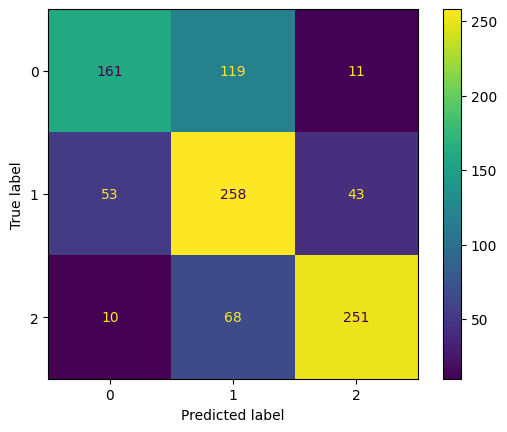

In [34]:
cf = confusion_matrix(y_test, y_pred)
plotcf = ConfusionMatrixDisplay(cf)
plotcf.plot()

In [35]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    negative       0.72      0.55      0.63       291
     neutral       0.58      0.73      0.65       354
    positive       0.82      0.76      0.79       329

    accuracy                           0.69       974
   macro avg       0.71      0.68      0.69       974
weighted avg       0.70      0.69      0.69       974



#De-Coding results

In [36]:
y_test.value_counts().sort_values()

negative    291
positive    329
neutral     354
Name: LABEL, dtype: int64

In [37]:
class_mapping = {0: "negative", 1: "neutral", 2: "positive"}

In [38]:
for i in range(cf.shape[0]):
    for j in range(cf.shape[1]):
        true_label = class_mapping[i]
        predicted_label = class_mapping[j]
        count = cf[i, j]
        print(f"True {true_label}, Predicted {predicted_label}: {count} instances")

True negative, Predicted negative: 161 instances
True negative, Predicted neutral: 119 instances
True negative, Predicted positive: 11 instances
True neutral, Predicted negative: 53 instances
True neutral, Predicted neutral: 258 instances
True neutral, Predicted positive: 43 instances
True positive, Predicted negative: 10 instances
True positive, Predicted neutral: 68 instances
True positive, Predicted positive: 251 instances


#Predicting new sentences

In [39]:
good_text = 'This is a great product! LOVE it!!!!!!! <3 <3 <3 <3'
bad_text = 'Horrible product. #I dont understand y people buy ittt >:O'
neutral_text = 'forty days and and a half have gone by'

In [40]:
sample = [good_text, bad_text, neutral_text]

In [41]:
def predict_result(text):
  text = clean_tweet(text)
  text = text_preprocessing(text)
  text = vectorizer.transform([text])
  predicted_numerical_label = logreg_model.predict(text.reshape(1, -1))
  predicted_textual_label = predicted_numerical_label[0]
  return(predicted_textual_label)

In [42]:
for text in sample:
  print(predict_result(text))

positive
neutral
negative


In [53]:
predict_result('Horrible product. #I dont understand y people buy ittt >:O')

'neutral'

#Saving model

In [44]:
import pickle

In [45]:
with open('model_and_vectorizer.pkl', 'wb') as file:
    pickle.dump((logreg_model, vectorizer), file)

#WordClouds

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [47]:
negative = df['lemmatizedTweet'][df['LABEL'] == 'negative']
negative

0                feel today   legday   jelly   ache   gym
1         arrivatw absolute disgrace carriage bangor h...
6       gna mad reach goal    reject wrong girl    get...
7       day      s daily routine    feel guuuuurdddd  ...
9       mike accept plastic rise    wfaamike   wfaacha...
                              ...                        
4839      buffalo   damone lewis sentence today       ...
4846    kat gets   beat killer sex   topless   submiss...
4861    rt   headquarters   fair   make want scream   ...
4862      fanghorn forest   alder   woodland glen   vo...
4863      s whisk     s way    powerless   bakersgonna...
Name: lemmatizedTweet, Length: 1452, dtype: object

In [48]:
positive = df['lemmatizedTweet'][df['LABEL'] == 'positive']
positive

2       valentine s    nephew   elated   little thing ...
4                    zoe s love   rattle   johnnyharper  
5       chaotic love    giclee print        art   love...
12        excited announce launch   affiliate program ...
22      find cool photo      brother    nephew        ...
                              ...                        
4857    big thank teacher attend   isabcpd     nice me...
4858                                dave    look elated  
4864    omg     eskom    man die   loadshedde    power...
4865                feelin   love    valentinesday   care
4868      colorsplash bw   zealous remedio   herbale y...
Name: lemmatizedTweet, Length: 1646, dtype: object

In [49]:
neutral = df['lemmatizedTweet'][df['LABEL'] == 'neutral']
neutral

3       betterfeelingfilm   rt instagram   day film   ...
8         animalabuse   toronto   puppy   torture offe...
15      today   stepbackintime       pwlhitfactory   k...
16      photo    photographer get rumble   jungle   be...
20                                sit plane    shake     
                              ...                        
4849    friday night look sort     newin   lbd   littl...
4859      dbel     scared   veryscare don t hold owt h...
4860    completely   unique   petrify   palm   earring...
4866                                  blue   eye t   beat
4867                 la chucha louuu te chupo los ojos   
Name: lemmatizedTweet, Length: 1771, dtype: object

In [50]:
sentiments = [negative, positive, neutral]
labels = ['negative', 'positive', 'neutral']

In [51]:
wc = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=80)

In [52]:
for sentiment, label in zip(sentiments, labels):
  wc.generate(' '.join(sentiment))
  plt.figure(figsize=(20, 3))
  plt.title(label)
  plt.axis('off')
  plt.imshow(wc, interpolation='bilinear')

  plt.savefig(f'{label}_wordcloud.png', bbox_inches='tight')
  plt.close()  # Close the current plot to avoid overlapping